In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

## Read the data

In [3]:

import os
from extract_pdf_data import read_pdfs

if not os.path.exists("wef_tertiary_enrolment.csv"):
    df = read_pdfs('tertiary education')
    df.to_csv("wef_tertiary_enrolment.csv", index=False)

In [4]:
from utils import read_wef_file

df = read_wef_file("wef_tertiary_enrolment.csv")
df.head()

,country,page_number,score,rank,diff,left,right
0,Albania,83,1.000,1.0,24.48,50.60,75.08
1,Algeria,85,1.000,1.0,28.61,39.40,68.01
2,Angola,87,0.899,112.0,-1.17,10.48,11.65
3,Argentina,89,1.000,1.0,64.82,75.48,140.30
4,Armenia,91,1.000,1.0,16.72,51.61,68.34


In [5]:
df['rank'].value_counts(dropna=False).head()

rank
1.0      104
NaN       11
112.0      1
117.0      1
131.0      1
Name: count, dtype: int64

In [6]:
df['score'].describe()

count    135.000000
mean       0.945726
std        0.128205
min        0.394000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [7]:
dinged = df['score'] < 1
dinged.sum()

np.int64(31)

Here is the distribution of their scores.

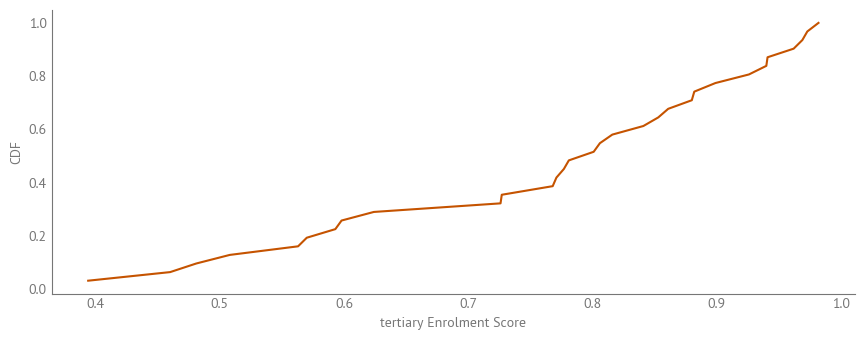

In [8]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='tertiary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

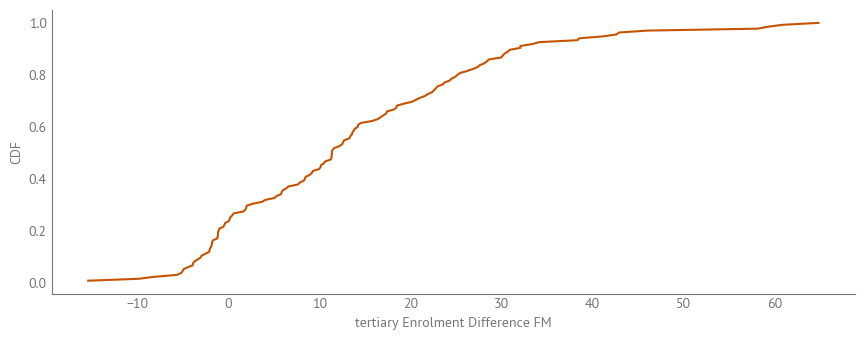

In [9]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='tertiary Enrolment Difference FM', ylabel='CDF')

In [10]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
145,Zimbabwe,373,0.962,108.0,-0.38,9.54,9.92
114,Senegal,311,0.973,106.0,-0.46,16.57,17.04
61,India,205,0.982,105.0,-0.59,32.81,33.40
103,Pakistan,289,0.926,111.0,-1.03,12.90,13.93
138,Tanzania,359,0.816,118.0,-1.10,4.88,5.98
92,Mozambique,267,0.853,116.0,-1.16,6.72,7.88
2,Angola,87,0.899,112.0,-1.17,10.48,11.65
134,Uganda,351,0.777,122.0,-1.20,4.16,5.36
53,Ghana,189,0.941,109.0,-1.24,19.77,21.00
23,Burundi,129,0.768,124.0,-1.71,5.66,7.37


## Revised scores

The scores are based on ratios, not differences, so let's compute those.

In [11]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    135.000000
mean       0.741685
std        0.147372
min        0.212956
25%        0.658574
50%        0.746673
75%        0.850590
max        0.999506
Name: ratio, dtype: float64

Looks like the ratio IS the score.

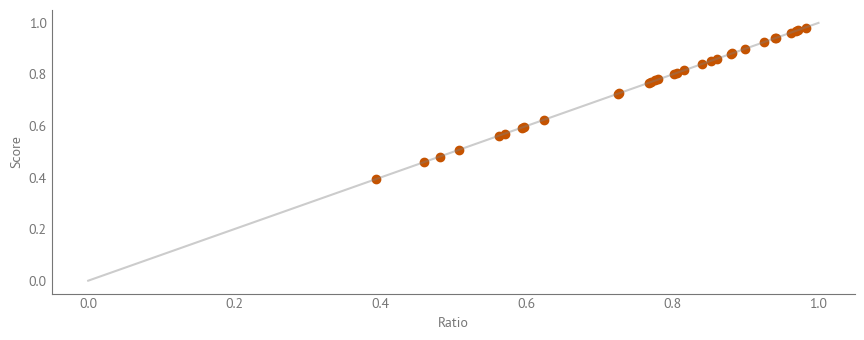

In [12]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')

So here are the revised, symmetric scores.

In [13]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    135.000000
mean       0.741685
std        0.147372
min        0.212956
25%        0.658574
50%        0.746673
75%        0.850590
max        0.999506
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

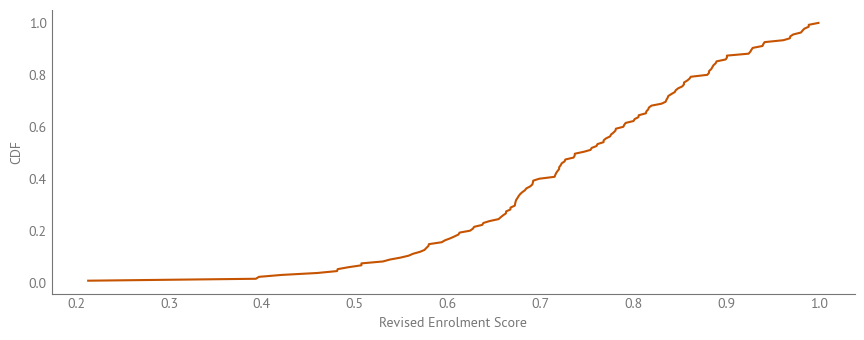

In [14]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

Here's the distribution of revised scores, compare to the original.

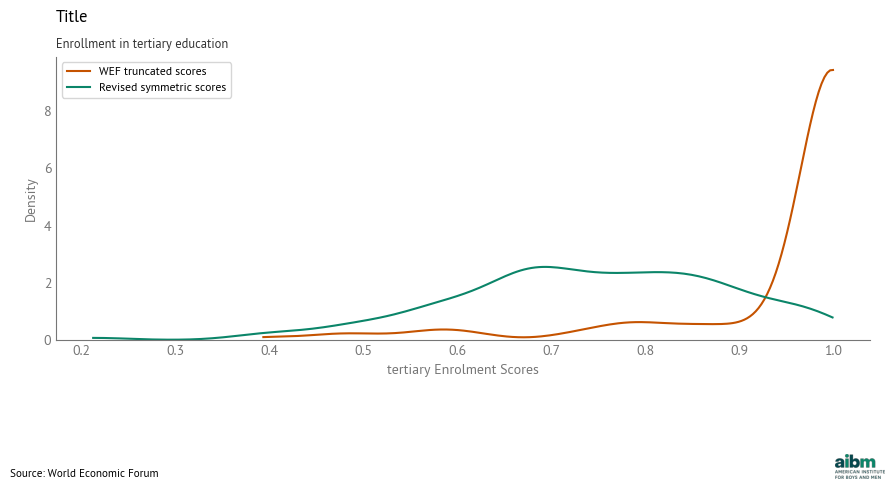

In [15]:
from utils import plot_score_distributions, add_title

plot_score_distributions(df, xlabel='tertiary Enrolment Scores')
add_title("Title",
          "Enrollment in tertiary education")

In [16]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(104, 9)

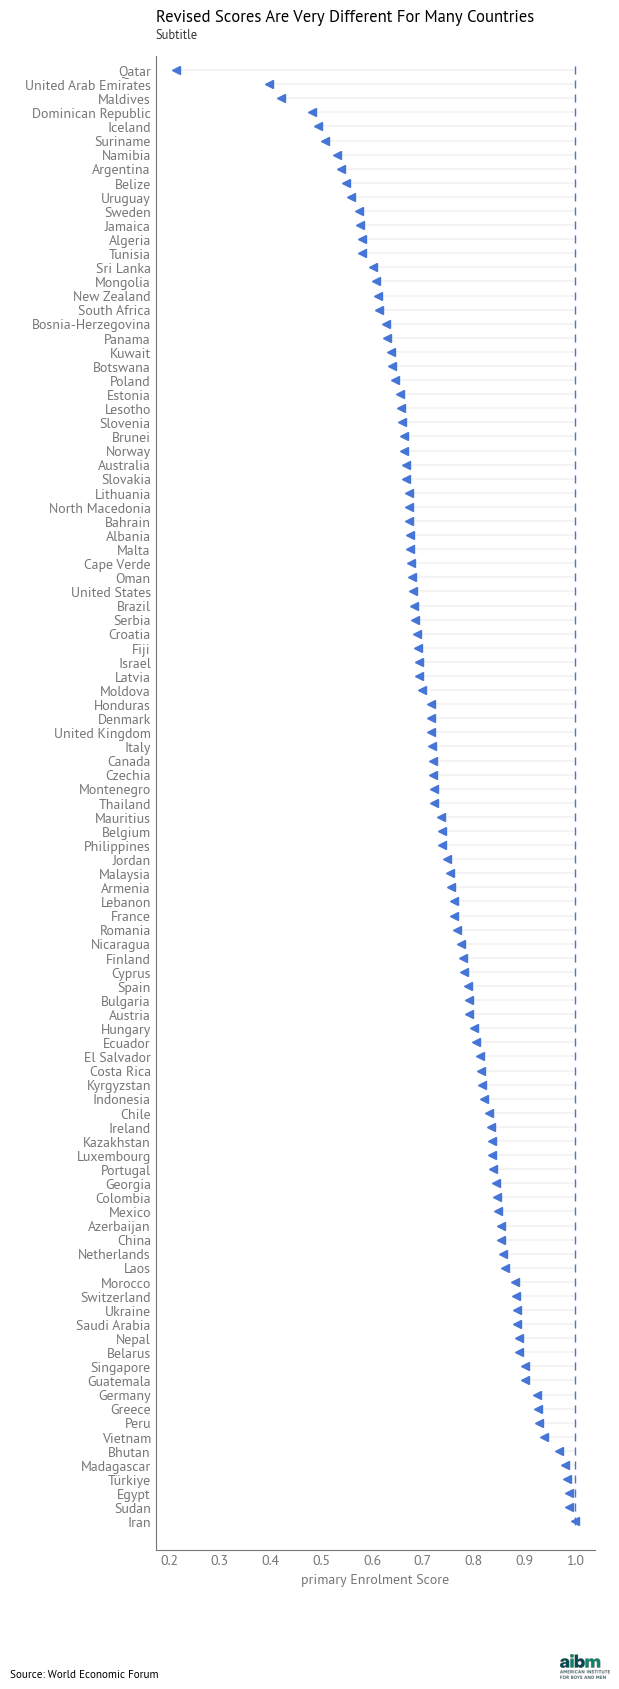

In [17]:
from utils import plot_revised_scores

plot_revised_scores(revised)

And here's the new ranking of countries based on revised scores.

In [18]:
df.reset_index()

,index,country,page_number,score,rank,diff,left,right,ratio,revised_score
0,0,Albania,83,1.000,1.0,24.48,50.60,75.08,0.673948,0.673948
1,1,Algeria,85,1.000,1.0,28.61,39.40,68.01,0.579327,0.579327
2,2,Angola,87,0.899,112.0,-1.17,10.48,11.65,0.899571,0.899571
3,3,Argentina,89,1.000,1.0,64.82,75.48,140.30,0.537990,0.537990
4,4,Armenia,91,1.000,1.0,16.72,51.61,68.34,0.755195,0.755195
...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,365,0.940,110.0,-2.54,39.87,42.41,0.940108,0.940108
142,142,Vanuatu,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143,Vietnam,369,1.000,1.0,2.65,40.93,43.58,0.939192,0.939192
144,144,Zambia,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Export the results

In [19]:
def make_table(df):
    columns = ['country', 'rank', 'revised_rank', 'score', 'revised_score', 'diff']
    df_sorted = df.sort_values(by='revised_score', ascending=False)
    df_sorted['revised_rank'] = np.arange(1, len(df_sorted)+1)
    table = df_sorted[columns]
    return table

In [20]:
table = make_table(df)
table.to_csv("wef_tertiary_enrolment_table.csv", index=False)
table.shape

(146, 6)

In [21]:
table['score'].describe()

count    135.000000
mean       0.945726
std        0.128205
min        0.394000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [22]:
from utils import make_weight_table

In [23]:
make_weight_table(table, 'tertiary')

original           revised          
               std inv std       std   inv std
tertiary  0.128205   0.078  0.147372  0.067856

## OECD countries

In [24]:
from utils import oecd_country_dict

def select_oecd(df):
    oecd_countries = set(oecd_country_dict.values())
    df_oecd = df.query('country in @oecd_countries').sort_values(by='revised_score')
    return df_oecd

df_oecd = select_oecd(df)
len(df_oecd)

38

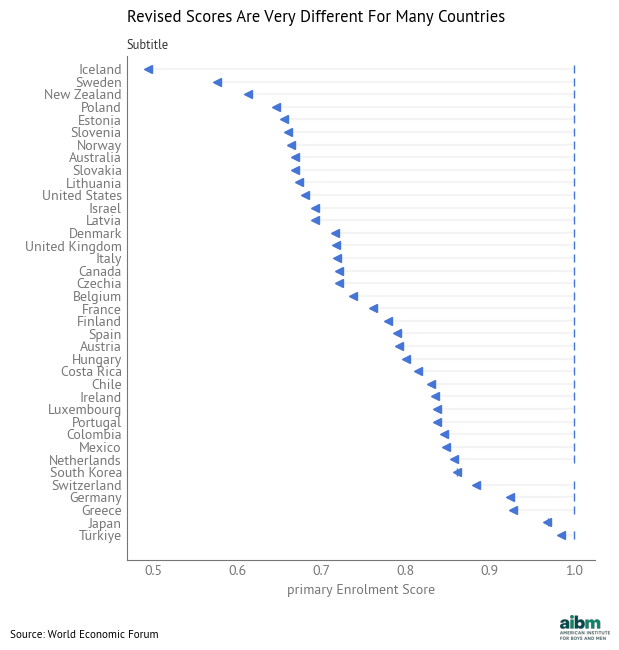

In [25]:
plot_revised_scores(df_oecd)

In [26]:
df.query("country == 'Ireland'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score
64,Ireland,211,1.0,1.0,14.2,71.78,85.98,0.834845,0.834845
